In [62]:
import pandas as pd
from datetime import datetime
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [31]:
PATH = 'src'

In [32]:
header = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 
          'Movie languages', 'Movie country', 'Movie genres']
df = pd.read_csv(PATH + '/movie.metadata.tsv', sep='\t', names=header, skipinitialspace=True)


In [33]:
df.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie country,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


### Cleaning df1

In [34]:
print("data set initial size = ", df.size)

data set initial size =  735669


In [35]:
df.isnull().values.any()

True

In [36]:
df.isnull().sum()

Wikipedia movie ID              0
Freebase movie ID               0
Movie name                      0
Movie release date           6902
Movie box office revenue    73340
Movie runtime               20450
Movie languages                 0
Movie country                   0
Movie genres                    0
dtype: int64

In [37]:

df = df[(df['Movie country'] != "{}") & (df['Movie languages'] != "{}") & (df['Movie genres'] != "{}")]
print(df.size)

576792


In [38]:
df['Movie country'] = df['Movie country'].apply(lambda x: list(ast.literal_eval(x).values())[0])
df['Movie genres'] = df['Movie genres'].apply(lambda x: list(ast.literal_eval(x).values()))
df['Movie languages'] = df['Movie languages'].apply(lambda x: list(ast.literal_eval(x).values()))

In [39]:
df.sample(10)


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie country,Movie genres
48444,1380766,/m/04y2vm,The Wendell Baker Story,2005-03-11,153169.0,99.0,[English Language],United States of America,"[Romantic comedy, Ensemble Film, Indie, Comedy..."
54023,682257,/m/032knp,Set It Off,1996-11-06,41590886.0,120.0,[English Language],United States of America,"[LGBT, Crime Fiction, Buddy film, Adventure, H..."
41461,25449048,/m/09k76dc,Smokin' Aces 2: Assasins' Ball,2010-01-19,NaN,86.0,[English Language],United States of America,"[Thriller, Crime Fiction, Gangster Film, Actio..."
24364,8824741,/m/027l26q,Track the Man Down,1955,NaN,75.0,[English Language],United Kingdom,"[Crime Fiction, Mystery]"
73114,2393755,/m/078z8d,Íslenski draumurinn,NaN,NaN,90.0,"[Icelandic Language, English Language, Thai La...",Iceland,"[Black comedy, Comedy, Indie]"
39878,23688078,/m/06zt5gj,La Stazione,1952,NaN,NaN,[Italian Language],Italy,[Comedy-drama]
40528,3269896,/m/092g22,Island at the Top of the World,1974-12-16,NaN,93.0,"[Icelandic Language, Swedish Language, English...",United States of America,"[Science Fiction, Adventure, Action/Adventure,..."
58669,1647182,/m/05kcwy,Mare Nostrum,1926,NaN,102.0,"[Silent film, English Language]",United States of America,"[Silent film, Indie, Black-and-white, Spy]"
57330,9344465,/m/02858xt,Afghantsi,1988-04-04,NaN,NaN,[English Language],United Kingdom,[Documentary]
79473,24131429,/m/07kjjgx,Beauty & the Briefcase,2010-04-18,NaN,83.0,[English Language],United States of America,"[Romantic comedy, Television movie, Drama, Com..."


In [40]:
df_date_revenue_clean = df.dropna(subset=['Movie release date', 'Movie box office revenue'])
df_date_clean = df.dropna(subset=['Movie release date'])
df_date_revenue_runtime_clean = df.dropna(subset=['Movie release date', 'Movie box office revenue', 'Movie runtime'])


#formating dates
def format_date(date) :
    date = date[:4]
    return date

df_date_revenue_clean['Movie release date'] = df_date_revenue_clean['Movie release date'].apply(format_date)
df_date_clean['Movie release date'] = df_date_clean['Movie release date'].apply(format_date)
df_date_revenue_runtime_clean['Movie release date'] = df_date_revenue_runtime_clean['Movie release date'].apply(format_date)



C:\Users\julie\AppData\Local\Temp\ipykernel_8532\35622789.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_revenue_clean['Movie release date'] = df_date_revenue_clean['Movie release date'].apply(format_date)
C:\Users\julie\AppData\Local\Temp\ipykernel_8532\35622789.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_clean['Movie release date'] = df_date_clean['Movie release date'].apply(format_date)
C:\Users\julie\AppData\Local\Temp\ipykernel_8532\35622789.py:13: SettingWithCopyWarning:

In [41]:
print('Size of the data with the dates cleaned up : ', df_date_clean.size)
print('Size of the data with the dates and the box office revenues cleaned up : ', df_date_revenue_clean.size)
print('Size of the data with the dates, the box office revenues and the runtimes cleaned up : ', df_date_revenue_runtime_clean.size)

Size of the data with the dates cleaned up :  555507
Size of the data with the dates and the box office revenues cleaned up :  72207
Size of the data with the dates, the box office revenues and the runtimes cleaned up :  71838


We can see that when we clean the rows that do not contain values of boow offic revenue the dataset is seriously reduced. The idea here is to keep a version of the dataset without taking care of the box office revenue when it is not the target of the analysis. We notice that the size difference between  df_date_revenue_clean and df_date_revenue_runtime_clean is negligeable, no need to treat them separately.

In [42]:

df_date_revenue_runtime_clean.sample(10)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie country,Movie genres
28713,240371,/m/01jw6z,Private Benjamin,1980,69847348.0,109.0,[English Language],United States of America,"[Parody, Comedy-drama, Satire, Drama, Comedy, ..."
17761,4639948,/m/0cd_cp,The House on Sorority Row,1983,10604986.0,92.0,[English Language],United States of America,"[Thriller, B-movie, Horror, Slasher, Teen]"
34879,4753099,/m/0clhj5,Big Stan,2007,8742330.0,105.0,[English Language],United States of America,"[Crime Comedy, Action/Adventure, Martial Arts ..."
32191,13272614,/m/03c01yq,Salsa,1988,8892589.0,97.0,[English Language],United States of America,"[Romantic drama, Romance Film, Drama]"
3596,3374650,/m/09894t,3:10 to Yuma,1957,1850000.0,92.0,[English Language],United States of America,"[Action/Adventure, Western, Action]"
23033,17923997,/m/043k1_h,All Good Things,2010,644535.0,101.0,[English Language],United States of America,"[Thriller, Detective, Mystery, Period piece, D..."
15572,2310825,/m/072w70,The Rage: Carrie 2,1999,17762705.0,105.0,[English Language],United States of America,"[Thriller, Horror, Teen]"
17141,709490,/m/034qzw,Anchorman: The Legend of Ron Burgundy,2004,90574188.0,97.0,"[French Language, English Language, Spanish La...",United States of America,"[Parody, Media Satire, Workplace Comedy, Cult,..."
13958,1235054,/m/04kvfm,Across 110th Street,1972,10000000.0,102.0,[English Language],United States of America,"[Thriller, Crime Fiction, Gangster Film, Actio..."
46364,21779605,/m/05mz4l6,Nowhere Boy,2009,6413733.0,93.0,[English Language],Canada,"[Biography, Family Drama, Coming of age, Drama..."


In [43]:
df_date_revenue_clean.sample(10)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie country,Movie genres
33029,737840,/m/0372qf,An American Werewolf in Paris,1997,26570463.0,105.0,"[French Language, English Language]",France,"[Horror, Comedy, Horror Comedy]"
2392,19024526,/m/04jkpgv,Antichrist,2009,2492704.0,103.0,[English Language],Denmark,"[Thriller, Horror, Indie, World cinema, Supern..."
15369,1091175,/m/045690,The Guru,2002,24128852.0,95.0,"[Hindi Language, English Language]",United States of America,"[Romantic comedy, Music, Romance Film, Fantasy..."
47811,13023421,/m/02z3rqk,"Definitely, Maybe",2008,55447968.0,105.0,[English Language],United States of America,"[Romantic comedy, Romance Film, Drama, Comedy]"
25785,1037250,/m/040fjs,Big Momma's House,2000,173959438.0,98.0,[English Language],United States of America,"[Crime Fiction, Comedy of Errors, Action, Come..."
15627,1851374,/m/060_dp,The War,1994,16480770.0,126.0,[English Language],United States of America,"[Period piece, Drama]"
27303,2229321,/m/06xpdt,Thunder Bay,1953,2400000.0,104.0,[English Language],United States of America,"[Action, Drama, Adventure, Addiction Drama]"
61234,17016725,/m/04q01mn,Gran Torino,2008,269958228.0,120.0,"[Hmong language, English Language]",United States of America,"[Tragedy, Drama, Indie]"
47749,901489,/m/03n7gj,Road House,1989,30050028.0,114.0,"[Portuguese Language, English Language]",United States of America,"[Thriller, Action/Adventure, Action, Drama]"
35778,1591834,/m/05d_mn,The Bachelor Party,1957,1500000.0,92.0,[English Language],United States of America,"[Ensemble Film, Melodrama, Drama]"


In [44]:
header2 = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date','Character Name', 'Actor DOB', 'Actor gender',
           'Actor height', 'Actor ethnicity', 'Actor name', 'Actor age at movie release', 'Freebase character map']
df2 = pd.read_csv(PATH + '/character.metadata.tsv', sep='\t', index_col=False, names=header2, skipinitialspace=True)

C:\Users\julie\AppData\Local\Temp\ipykernel_8532\2071516340.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df2 = pd.read_csv(PATH + '/character.metadata.tsv', sep='\t', index_col=False, names=header2, skipinitialspace=True)


In [45]:
df2.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character Name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character map
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r


In [46]:
df2.isnull().values.any()

True

In [47]:
df2.isnull().sum()

Wikipedia movie ID                 0
Freebase movie ID                  0
Movie release date              9995
Character Name                257875
Actor DOB                     106145
Actor gender                   45609
Actor height                  295845
Actor ethnicity               344611
Actor name                      1228
Actor age at movie release    158113
Freebase character map             0
dtype: int64

In [48]:
merged_df = pd.merge(df, df2, on='Wikipedia movie ID', how='inner')

merged_df = merged_df.drop(columns=['Freebase movie ID_y', 'Movie release date_y'])

merged_df = merged_df.rename(columns={'Freebase movie ID_x': 'Freebase movie ID', 
                                      'Movie release date_x': 'Movie release date'})


In [49]:
merged_df.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie country,Movie genres,Character Name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character map
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,"[Thriller, Science Fiction, Horror, Adventure,...",Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,"[Thriller, Science Fiction, Horror, Adventure,...",Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m
2,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,"[Thriller, Science Fiction, Horror, Adventure,...",Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g
3,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,"[Thriller, Science Fiction, Horror, Adventure,...",Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6
4,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,"[Thriller, Science Fiction, Horror, Adventure,...",Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r


In [50]:
merged_df.isnull().values.any()

True

In [51]:
merged_df.isnull().sum()

Wikipedia movie ID                 0
Freebase movie ID                  0
Movie name                         0
Movie release date              4646
Movie box office revenue      309289
Movie runtime                  36529
Movie languages                    0
Movie country                      0
Movie genres                       0
Character Name                224626
Actor DOB                      97865
Actor gender                   41680
Actor height                  267460
Actor ethnicity               312605
Actor name                      1108
Actor age at movie release    140287
Freebase character map             0
dtype: int64

In [52]:
count = 0
for i in range (len(merged_df)):
    if merged_df.iloc[i].duplicated().all():
        count+=1

print("Nb of duplicated row : ",count)

Nb of duplicated row :  0


In [53]:

# Supprimer les valeurs NaN de la colonne 'Movie release date'
merged_df = merged_df.dropna(subset=['Movie release date'])

# Fonction pour compléter les dates partiellement formatées
def complete_date(date):
    if len(date) == 4:  # Si la date contient seulement l'année (format '%Y')
        return date + "-01-01"  # Compléter avec le 1er janvier de l'année
    elif len(date) == 7:  # Si la date contient l'année et le mois (format '%Y-%m')
        return date + "-01"  # Compléter avec le 1er jour du mois
    return date  # Si la date est déjà complète (format '%Y-%m-%d')

# Appliquer la fonction pour compléter les dates partiellement formatées
merged_df['Movie release date'] = merged_df['Movie release date'].apply(complete_date)

# Filtrer les dates qui sont en dehors de la plage valide (1677-2262)
def filter_out_of_bounds(date):
    try:
        # Tenter la conversion en datetime pour voir si elle est valide
        pd.to_datetime(date)
        return True  # Si la conversion réussit, la date est valide
    except pd.errors.OutOfBoundsDatetime:
        return False  # Si une erreur est levée, la date est hors limites

# Appliquer le filtre pour garder uniquement les dates dans la plage valide
merged_df = merged_df[merged_df['Movie release date'].apply(filter_out_of_bounds)]

# Convertir les dates restantes en format datetime
merged_df['Movie release date'] = pd.to_datetime(merged_df['Movie release date'], format='%Y-%m-%d', errors='coerce')

min_date = merged_df['Movie release date'].min()
max_date = merged_df['Movie release date'].max()

print(min_date)
print(max_date)

1888-01-01 00:00:00
2015-01-01 00:00:00


# Data Analysis

### 1) Dataset Exploration

In [54]:
df_date_clean.describe()

,Wikipedia movie ID,Movie box office revenue,Movie runtime
count,6.172300e+04,8.023000e+03,5.088400e+04
mean,1.539445e+07,4.964490e+07,1.161865e+02
std,1.067145e+07,1.141051e+08,4.784577e+03
min,3.300000e+02,1.000000e+04,0.000000e+00
25%,5.698346e+06,2.249000e+06,8.300000e+01
50%,1.399171e+07,1.144980e+07,9.400000e+01
75%,2.405106e+07,4.304346e+07,1.070000e+02
max,3.750192e+07,2.782275e+09,1.079281e+06


In this analysis, we focus on the first 18 countries which produce the more movies

['United States of America', 'India', 'United Kingdom', 'France', 'Japan', 'Italy', 'Argentina', 'Canada', 'Germany', 'Hong Kong', 'Mexico', 'Australia', 'South Korea', 'Spain', 'Russia', 'Netherlands', 'Denmark', 'Sweden']


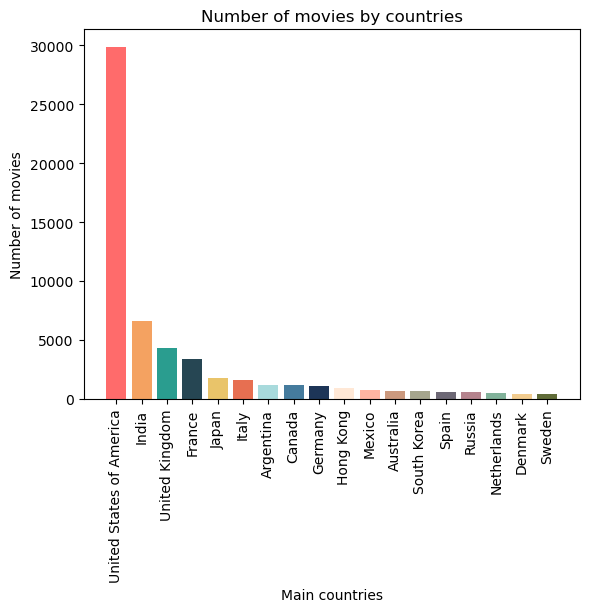

In [129]:
countries = df_date_clean.groupby(['Movie country']).count()['Wikipedia movie ID']

countries['Russia'] = countries['Russia'] + countries['Soviet Union']
countries['Germany'] = countries['Germany'] + countries['German Democratic Republic'] + countries['West Germany']
countries = countries.drop('Soviet Union')
countries = countries.nlargest(18)
countries_names = countries.index.to_list()

colors = [
    "#FF6B6B", "#F4A261", "#2A9D8F", "#264653", "#E9C46A", "#E76F51", "#A8DADC", "#457B9D", "#1D3557", "#FFE8D6",  # Pêche pâle
    "#FFB4A2",  # Rose pêche
    "#CB997E",  # Brun doux
    "#A5A58D",  # Olive grisâtre
    "#6D6875",  # Lavande grisé
    "#B5838D",  # Rose bois de rose
    "#81B29A",  # Vert menthe
    "#F2CC8F",  # Jaune pâle
    "#606C38"   # Vert olive foncé
]


print(countries_names)
plt.bar(countries_names,countries,width=0.8, color = colors)
plt.xticks(rotation=90)
plt.xlabel('Main countries')
plt.ylabel('Number of movies')
plt.title('Number of movies by countries')
plt.show()

['United States of America', 'India', 'United Kingdom', 'France', 'Japan', 'Italy', 'Argentina', 'Canada', 'Germany', 'Hong Kong', 'Mexico', 'Australia', 'South Korea', 'Spain', 'Russia', 'Netherlands', 'Denmark', 'Sweden']


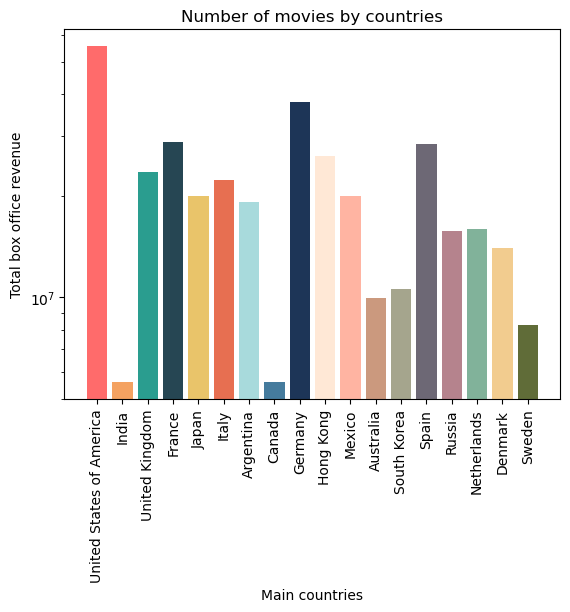

In [138]:
countries_revenues = df_date_revenue_clean.groupby(['Movie country'])['Movie box office revenue'].mean()
print(countries_names)
countries_revenues['Germany'] = (countries_revenues['Germany'] + countries_revenues['West Germany'])/2
countries_revenues = countries_revenues.drop('West Germany')
countries_revenues = countries_revenues[countries_names]



plt.bar(countries_names, countries_revenues, color = colors)
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Main countries')
plt.ylabel('Total box office revenue')
plt.title('Number of movies by countries')
plt.show()

In this section, we will focus on the 4 biggest film producers and analyse their movie production over the years, starting from 1890 to 2016.

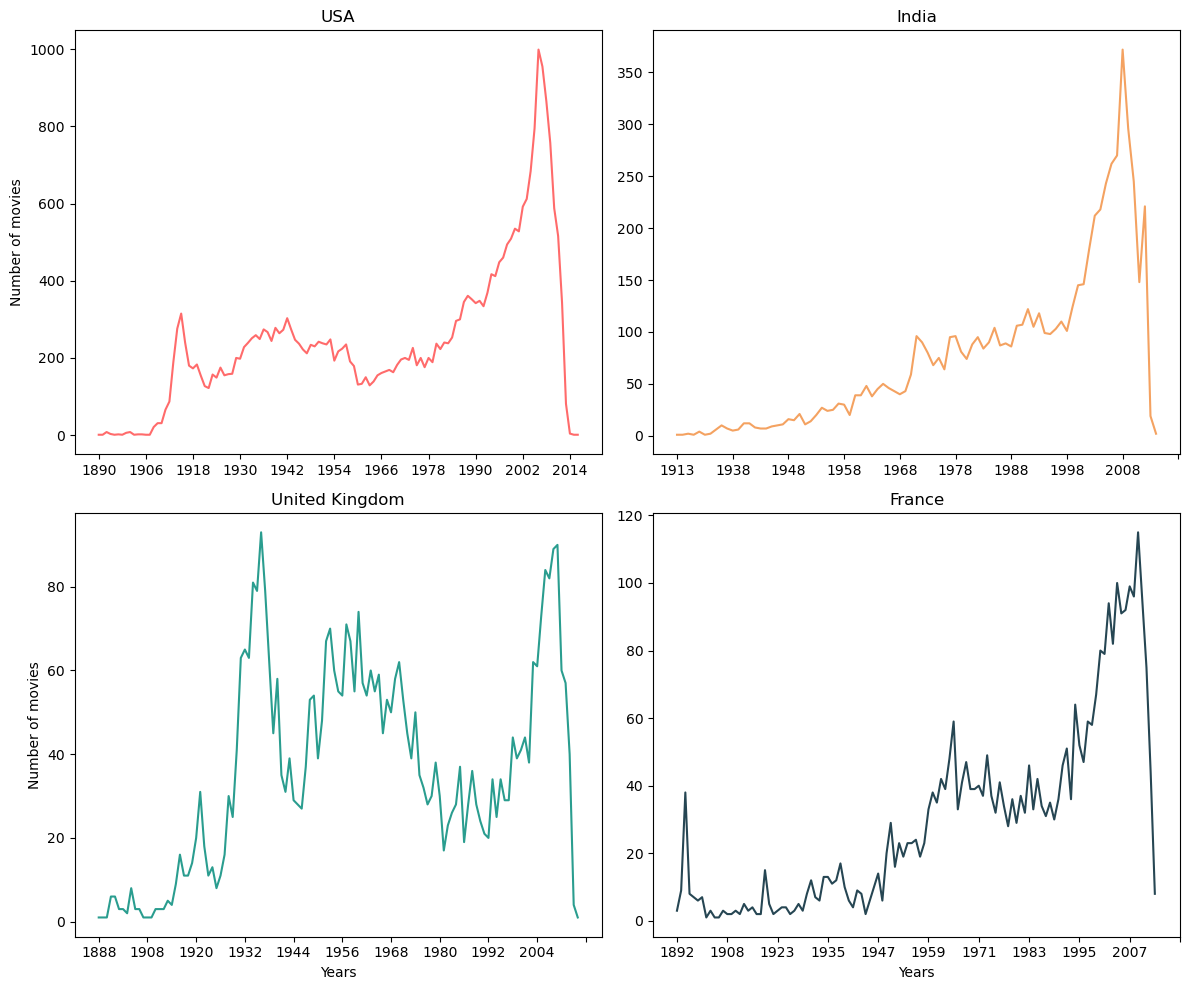

'\n\nplt.plot(years_usa,nb_per_year_usa, color="#FF6B6B")\nplt.plot(years_india,nb_per_year_india, color="#F4A261")\nplt.plot(years_uk,nb_per_year_uk, color="#2A9D8F")\nplt.plot(years_fra,nb_per_year_fra, color="#264653")\nplt.xticks(np.arange(0,127,12))\n\nplt.xlabel(\'Years\')\nplt.show()\n'

In [165]:
df_usa = df_date_clean[df_date_clean['Movie country'] == 'United States of America']
df_india = df_date_clean[df_date_clean['Movie country'] == 'India']
df_uk = df_date_clean[df_date_clean['Movie country'] == 'United Kingdom']
df_fra = df_date_clean[df_date_clean['Movie country'] == 'France']
nb_per_year_usa = df_usa.groupby('Movie release date').count()['Wikipedia movie ID']
nb_per_year_india = df_india.groupby('Movie release date').count()['Wikipedia movie ID']
nb_per_year_uk = df_uk.groupby('Movie release date').count()['Wikipedia movie ID']
nb_per_year_fra = df_fra.groupby('Movie release date').count()['Wikipedia movie ID']   
                                                     
years_usa = nb_per_year_usa.index.to_list()
years_india = nb_per_year_india.index.to_list()
years_uk = nb_per_year_uk.index.to_list()
years_fra = nb_per_year_fra.index.to_list()



fig, axs = plt.subplots(2, 2, figsize=(12, 10))


axs[0, 0].plot(years_usa, nb_per_year_usa,color="#FF6B6B")
axs[0, 0].set_title("USA")
axs[0, 0].set_xticks(np.arange(0,127,12))
axs[0, 0].set_ylabel("Number of movies")

axs[0, 1].plot(years_india, nb_per_year_india, color="#F4A261")
axs[0, 1].set_title("India")
axs[0, 1].set_xticks(np.arange(0,100,10))




axs[1, 0].plot(years_uk, nb_per_year_uk,color="#2A9D8F")
axs[1, 0].set_title("United Kingdom")
axs[1, 0].set_xlabel("Years")
axs[1, 0].set_xticks(np.arange(0,127,12))
axs[1, 0].set_ylabel("Number of movies")


axs[1, 1].plot(years_fra, nb_per_year_fra,color="#264653")
axs[1, 1].set_title("France")
axs[1, 1].set_xticks(np.arange(0,127,12))
axs[1, 1].set_xlabel("Years")



plt.tight_layout()

plt.show()

"""

plt.plot(years_usa,nb_per_year_usa, color="#FF6B6B")
plt.plot(years_india,nb_per_year_india, color="#F4A261")
plt.plot(years_uk,nb_per_year_uk, color="#2A9D8F")
plt.plot(years_fra,nb_per_year_fra, color="#264653")
plt.xticks(np.arange(0,127,12))

plt.xlabel('Years')
plt.show()
"""

The global trend that we see on the 4 graphs is an increase of the movie production between 1890 and 2007. We can interprate those result and estimate that the advancement of new technologies worldwide are the major cause of this increase.

We can observe a drop in the american movie production around 1915 which coincides with World War I. It did not really affected the UK and France because their movie production was very low at that time. India was not involved in World War I. Concerning World War II the observation is a bit different. We notice a huge decrease of number of movie for the UK and a small one for France and the USA around 1939-1945. This can be explained because those 3 countries were involved int the war.

Around 2007, we discern a fall of prodcution for the 4 countries. This date corresponds to the appearance of Netflix, a platform that offers a streaming service of movies, series. People can access to huge number of movies very easily without having to go to cinema theatres.

Movie country                  
Afghanistan               51762       101543.0
Argentina                 53940     48245593.0
                          68033     25793614.0
                          27850     18052128.0
                          4410      17159458.0
                                      ...     
United States of America  13479    921111197.0
Venezuela                 1866       3579383.0
Weimar Republic           6737         77982.0
West Germany              62222     84970337.0
                          18126     25948300.0
Name: Movie box office revenue, Length: 450, dtype: float64


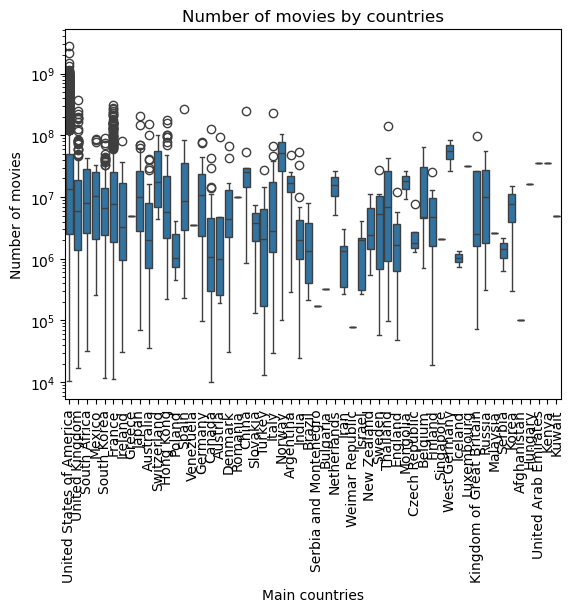

In [101]:
#à modifier c'est dégueu
countries_revenues = df_date_revenue_clean.groupby(['Movie country'])['Movie box office revenue']

countries_revenues = countries_revenues.nlargest(20)
countries_names = countries_revenues.index.to_list()

print(countries_revenues)
sns.boxplot(x='Movie country', y='Movie box office revenue', data=df_date_revenue_clean)
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel('Main countries')
plt.ylabel('Number of movies')
plt.title('Number of movies by countries')
plt.show()